# Data Analysis Interview Challenge
#### Ultimate Challenge - Eleanor Hoyt

### Part 1. Exploratory Data Analysis

Use the logins dataset to aggregate counts of users by 15-min intervals. Visualize and describe the login counts.

In [1]:
# import packages and read in logins data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [139]:
logins_df = pd.read_json('ultimate_challenge/logins.json')

In [140]:
# view dataframe
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [141]:
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


There appears to be 93,142 observations spanning between Jan 1 1970 and Apr 13 1970.

In [142]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


These observations are already in a datetime format and there are no null entries.

In [143]:
# Aggregate logins by 15 minute intervals and collect count.

logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
logins_df = logins_df.resample('15T').count()

In [144]:
logins_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [145]:
logins_df.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


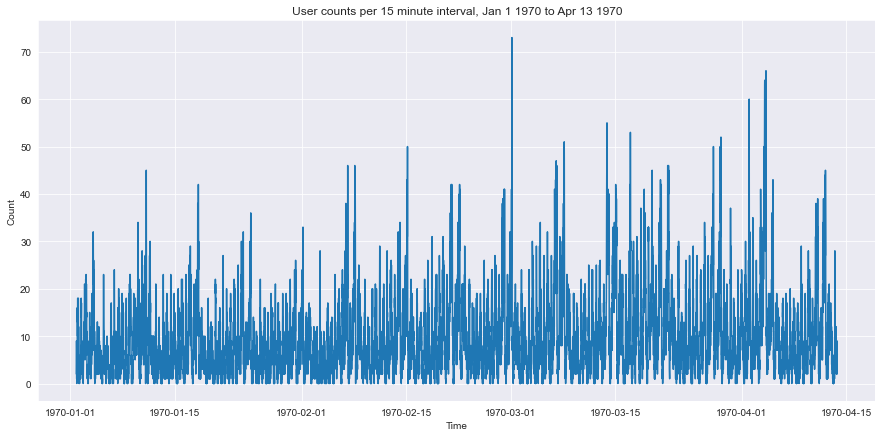

In [146]:
# Visualize counts over time 

_ = plt.figure(figsize=(15, 7))
_ = plt.plot(logins_df)
_ = plt.title('User counts per 15 minute interval, Jan 1 1970 to Apr 13 1970')
_ = plt.xlabel('Time')
_ = plt.ylabel('Count')
plt.show()

Overall, there appears to be some repeating patterns which may be on a weekly and/or daily cycle. There also appears to be a large spike around the beginning of March.

In [147]:
# Explore weekly cycles by creating a new day-of-the-week indicator feature

logins_df = logins_df.reset_index()
logins_df['day of week'] = logins_df['login_time'].dt.dayofweek
logins_df.head()

,login_time,count,day of week
0,1970-01-01 20:00:00,2,3
1,1970-01-01 20:15:00,6,3
2,1970-01-01 20:30:00,9,3
3,1970-01-01 20:45:00,7,3
4,1970-01-01 21:00:00,1,3


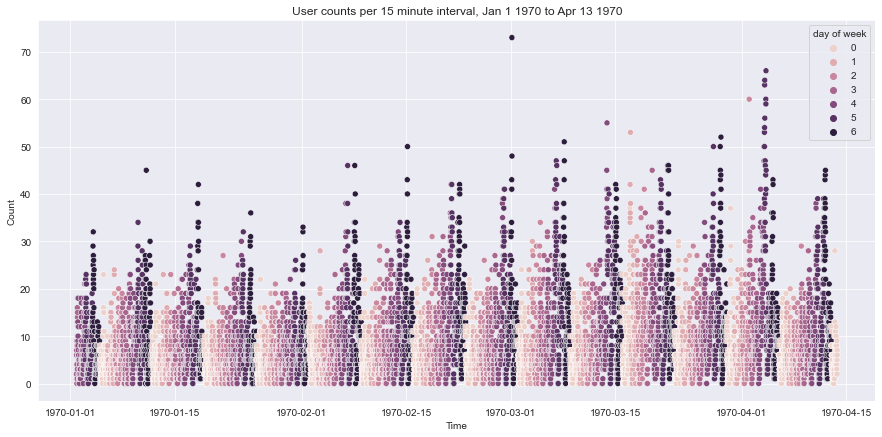

In [148]:
# Replot, color by day of week

_ = plt.figure(figsize=(15, 7))
_ = sns.scatterplot(data=logins_df, x='login_time', y='count', hue='day of week')
_ = plt.title('User counts per 15 minute interval, Jan 1 1970 to Apr 13 1970')
_ = plt.xlabel('Time')
_ = plt.ylabel('Count')
plt.show()

User counts have a clear increase on weekend days as indicated by the darker purple colors for Saturday and Sunday (days # 5 and 6). In general, usership appears to start low on Mondays and increase across the week through the weekend. There also appears to be a gradual increasing trend over the entire study period from Jan through Apr.

In [149]:
# find average number of users for each weekday

logins_df_wkdayAvg = logins_df.groupby('day of week').mean()
logins_df_wkdayAvg

,count
day of week,
0,6.213380
1,6.895833
2,7.692708
3,8.794118
4,10.561111
5,13.456250
6,12.615972


The observations from the above graph are supported by average user counts for each day of the week being the highest towards the end of the week (Friday, Saturday, Sunday). 

In [150]:
# zoom in to view cycles within a day over a single week from Monday Jan 5th through Sunday Jan 11th

mask = (logins_df['login_time'] > '1970-01-05') & (logins_df['login_time'] <= '1970-01-11')
logins_df_zoom = logins_df.loc[mask]

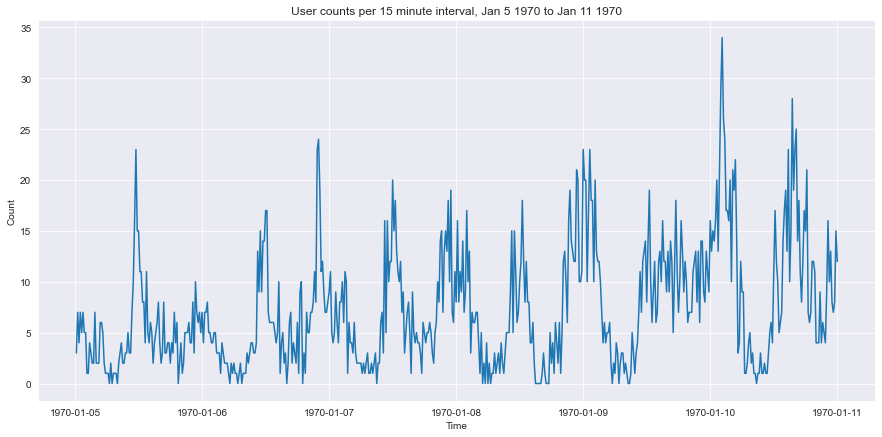

In [151]:
# plot user counts over the first full week in January 1970

_ = plt.figure(figsize=(15, 7))
_ = sns.lineplot(data=logins_df_zoom, x='login_time', y='count')
_ = plt.title('User counts per 15 minute interval, Jan 5 1970 to Jan 11 1970')
_ = plt.xlabel('Time')
_ = plt.ylabel('Count')
plt.show()

During this particular week in January, weekdays appear to see higher user counts during the middle of the day, perhaps during lunch time travel. As the week progresses, user counts start shifting toward the end of the day, likely due to more active nightlife.

In [152]:
logins_df.head(20)

,login_time,count,day of week
0,1970-01-01 20:00:00,2,3
1,1970-01-01 20:15:00,6,3
2,1970-01-01 20:30:00,9,3
3,1970-01-01 20:45:00,7,3
4,1970-01-01 21:00:00,1,3
5,1970-01-01 21:15:00,4,3
6,1970-01-01 21:30:00,0,3
7,1970-01-01 21:45:00,4,3
8,1970-01-01 22:00:00,9,3
9,1970-01-01 22:15:00,8,3


In [159]:
# Find average daily cycles for each weekday, extract time of day

logins_df.set_index('login_time', inplace=True)

logins_df_group = logins_df.groupby([logins_df.index.hour, 'day of week']).mean()
logins_df_group.head()

count
login_time day of week           
0          0             8.850000
           1            10.839286
           2            12.267857
           3            14.571429
           4            16.250000

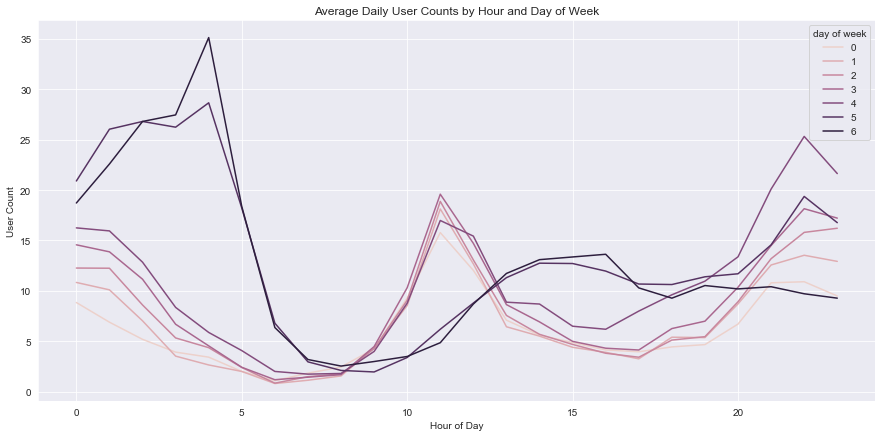

In [160]:
_ = plt.figure(figsize=(15, 7))
_ = sns.lineplot(data = logins_df_group, x='login_time', y = 'count', hue='day of week')
_ = plt.title('Average Daily User Counts by Hour and Day of Week')
_ = plt.xlabel('Hour of Day')
_ = plt.ylabel('User Count')
plt.show()

On average, weekdays follow very similar patterns with clear uptick in users midday. Weekends see many more users in the early hours of the morning and late at night.

#### Observations
There were 93,142 logins during this three month study period. When aggregated into 15-minute intervals, the average number of logins was 9.5 and the maximum was 73. User logins over the study period follow a general weekly cycle with lower logins during the early weekdays and increasing logins over the weekends. On a daily scale, there are two general patterns observed. Weekdays see a spike in logins middday with lower logins in the morning and evenings whereas weekend days are slower in the morning hours with a gradual increase in logins throughout the evening and peaks after midnight. 

#### Future work

In future analysis, consider exploring whether there are statistical differences and/or trends between months of the year and weeks of the month. This information may help guide marketing to target specific peak times of use. Also consider exploring the extreme data point observed in early March. Perhaps other data from the company may allow for more insight into whether that point is an outlier or if there was a particular event that day which drove up user counts.

### Part 2. Experiment and Metrics Design

1. What is a key measure of success in an experiment to encourage drivers to serve both cities?

Success for this experiment will be drivers utilizing the reimbursement program and operating in both cities when under business-as-usual conditions they would have only operating in their home city. To measure this success, the company could evaluate the change in pickups or dropoffs in both cities by driver. In other words, for a sample of drivers, measure the ratio of pickups in Gotham vs Metropolis and evaluate whether that ratio increases over time with the new reimbursement program.

This measure may be most valuable when limited to weekends when there is reasonable activity in both cities. The results may be biased when looking at other times of the week when activity is not comparable.

2. Describe a practical experiment.

This experiment could be evaluated using a one-tailed z-test. 

a. Before implementing the toll reimbursement program, the company should sample drivers data and evaluate the business-as-usual case. This involves calculating an average pickup ratio between the two cities during specific weekend hours. The company should sample as many drivers as possible, but at least over 100. Following implementatino of the toll reimbursement program, collect the same pickup ratio data during the same specific weekend hours. Use a one-tailed z-test to determine whether there is a significant difference.

b. A one-tailed z-test can be used to determine statistical significance. Under this test, the null hypothesis would be that the average ratios are the same and the alternative hypothesis would be that the average ratio has increased signficantly.

c. If the null hypothesis was not rejected, the interpretation would be that the reimbursement program has not had significant impact on the drivers willingness to serve both cities. The recommendation would be to stop the program, alter the program with new parameters/benefits, ensure drivers are aware of and using the program, or possibly sample again over a longer period of time.

If the null hypothesis was rejected, the interpretation would be that the reimbursement program has significantly increased the drivers willingness to serve both cities. The recommendation would be to continue the program and re-evaluate after a period of time to confirm these results persist and to consider implementation of this program in other regions or cities with similar conditions.

Limitations and caveats to consider will be the study sample size and sample period. Conducting additional studies with larger samples or over longer periods of time may allow for confirmation of results. Care should also be taken to ensure the study is not conducted during non-business-as-usual time periods such as holidays or days with large city events. There is also the possibility that drivers may use the new reimbursement program in the beginning but then determine after time that is it not enough of an incentive to continue over time. In this case, further study should be conducted after six-months or one year and the company should consider investigating whether there are other barriers preventing drivers from crossing the bridge.

### Part 3. Predictive Modeling

Evaluate rider retention using the ultimate challenge dataset. Build a predictive model to determine whether a user will be active.

#### Read in data, replace missing values

In [32]:
# import additional packages

import numpy as np

In [2]:
# read in the dataset

ult_df = pd.read_json('ultimate_challenge/ultimate_data_challenge.json')
ult_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
# check data types and for missing values

ult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Some missing values in avg_rater_of_driver, phone, and avg_rater_by_driver. Also date variables were read in as objects.

In [4]:
# check df numerical values

ult_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


Values seem reasonable with min/max values for ratings between 0-5 and percent values not exceeding 100.

In [5]:
# fill missing rater values with the mean rating

ult_df['avg_rating_of_driver'].fillna(ult_df['avg_rating_of_driver'].mean(), inplace=True)
ult_df['avg_rating_by_driver'].fillna(ult_df['avg_rating_by_driver'].mean(), inplace=True)

In [8]:
# fill missing phone values with the most common value

ult_df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [9]:
ult_df['phone'].fillna('iPhone', inplace=True)

In [14]:
# change date type

ult_df['signup_date'] = pd.to_datetime(ult_df['signup_date'])
ult_df['last_trip_date'] = pd.to_datetime(ult_df['last_trip_date'])

In [31]:
# check date ranges
print(ult_df['signup_date'].min())
print(ult_df['signup_date'].max())
print(ult_df['last_trip_date'].min())
print(ult_df['last_trip_date'].max())

2014-01-01 00:00:00
2014-01-31 00:00:00
2014-01-01 00:00:00
2014-07-01 00:00:00


In [16]:
# check the remaining object variable for unusual entries

ult_df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

#### Exploratory data analysis

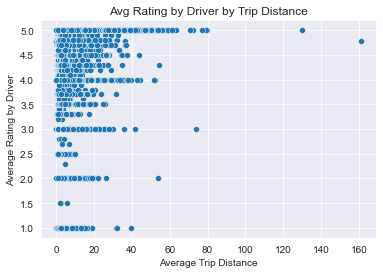

In [17]:
# create a few plots to explore data

# average distance vs average rating by driver
_ = sns.scatterplot(data=ult_df, x='avg_dist', y='avg_rating_by_driver')
_ = plt.xlabel('Average Trip Distance')
_ = plt.ylabel('Average Rating by Driver')
_ = plt.title('Avg Rating by Driver by Trip Distance')
plt.show()

Riders with longer average trip distance also tend to have higher ratings by their driver.

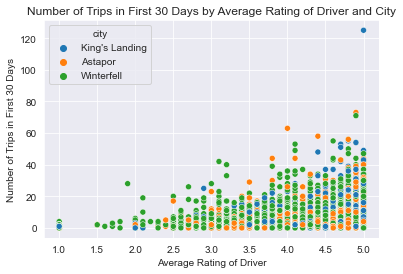

In [28]:
# trips in first 30 days by signup date and city

_ = sns.scatterplot(data=ult_df, x='avg_rating_of_driver', y='trips_in_first_30_days', hue='city')
_ = plt.xlabel('Average Rating of Driver')
_ = plt.ylabel('Number of Trips in First 30 Days')
_ = plt.title('Number of Trips in First 30 Days by Average Rating of Driver and City')
plt.show()

Riders who gave higher average ratings to their drivers also tended to take more trips in their first 30 days on the platform. But this does not seem to matter by city.

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


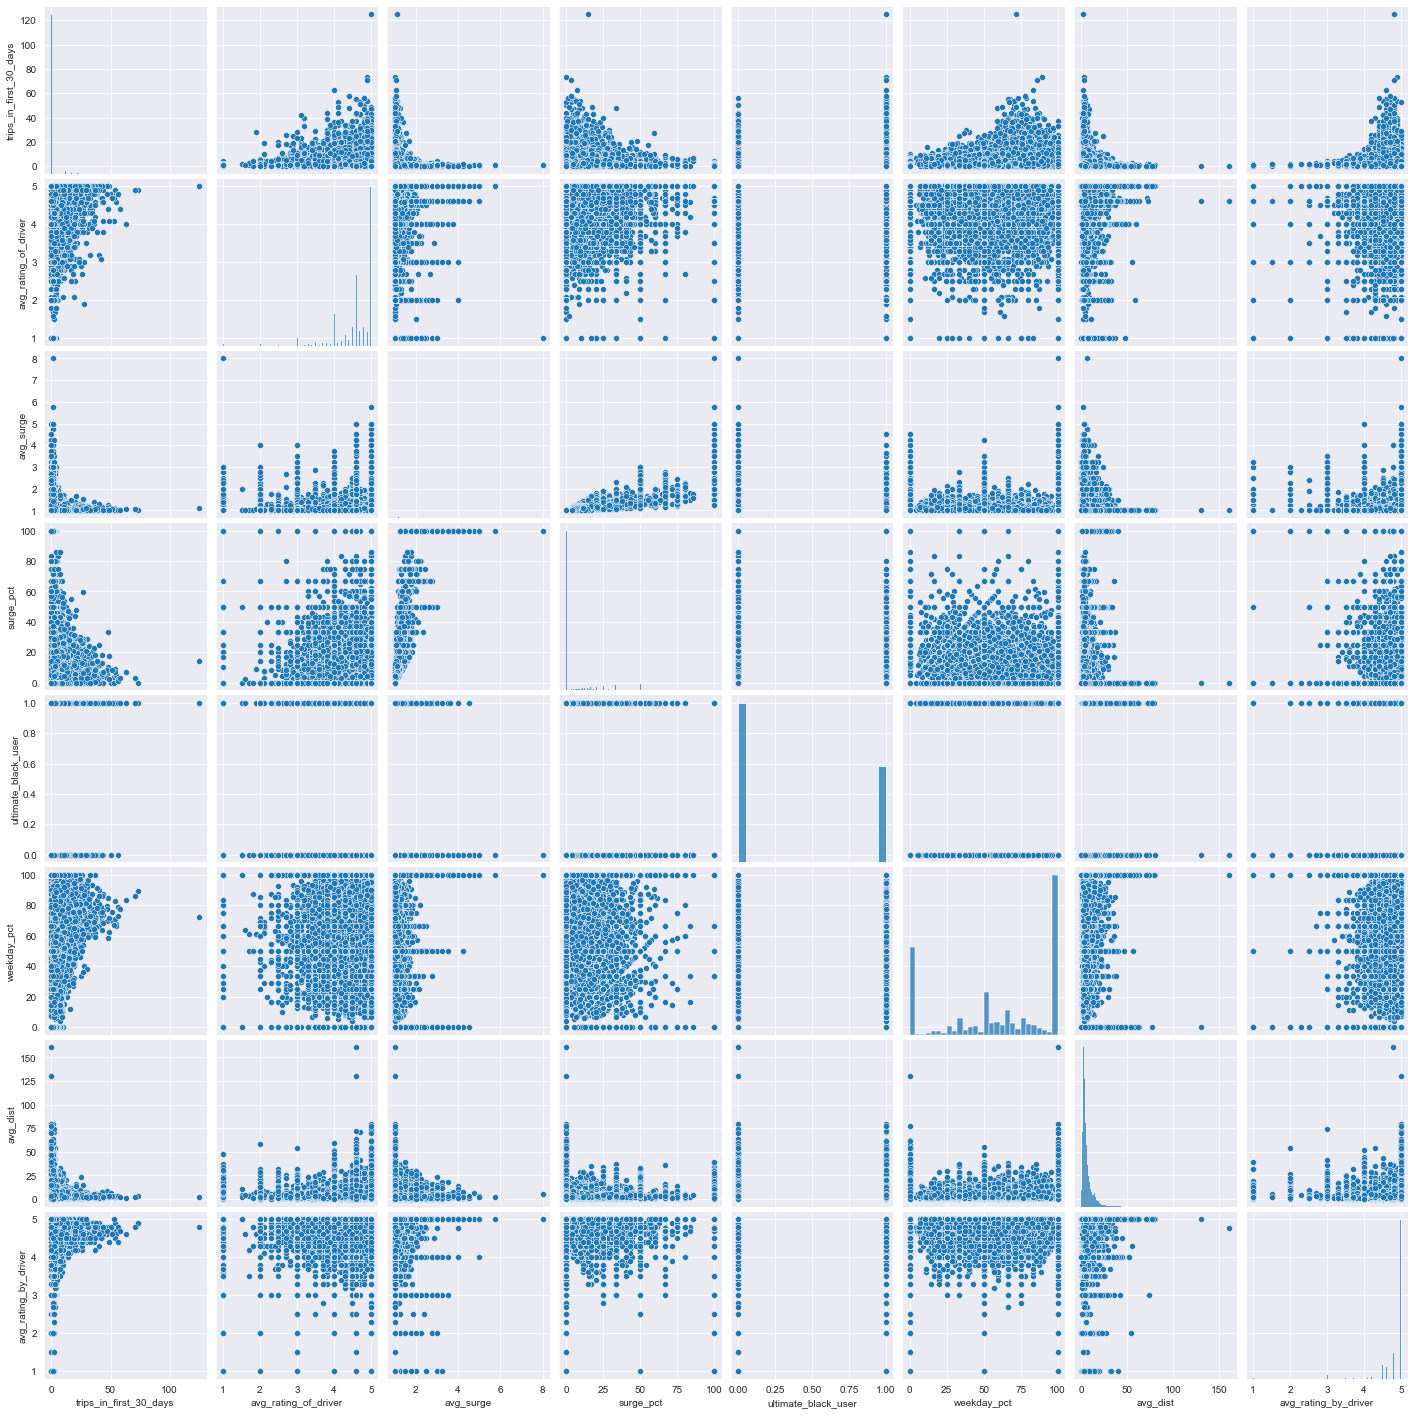

In [20]:
# check pairplot to investigate other relationships

_ = sns.pairplot(ult_df)
plt.show()

There may be an outlier in the first trips in 30 days variable. Is it possible to have taken 120 trips in 30 days? We will leave this possible outlier in the dataset for now but keep it in mind for further investigation.

#### Build a Predictive Model

Riders are considered retained if they are active in their 6th month of being in the system. Therefore, we need to create a variable to describe "retained" which would be a rider whose last trip occurred in the month of June. 

In [33]:
# create variable to predict

ult_df['retained'] = np.where(ult_df['last_trip_date'] >= '2014-06-01', 1, 0)
ult_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [34]:
# one hot encode remaining categorical variables

df = pd.get_dummies(ult_df)
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0


In [38]:
# values need to be numerical, create new features from datetime variables, then drop those variables

df['signup_day_of_month'] = df['signup_date'].dt.day
df['last_trip_month'] = df['last_trip_date'].dt.month

In [40]:
df.drop(columns=['signup_date', 'last_trip_date'], inplace=True)

In [43]:
# convert boolean variable from True/False to 1/0

df['ultimate_black_user'] = np.where(df['ultimate_black_user'], 1, 0)

In [45]:
# set up X and y variables

X = df.drop(columns=['retained'])
y = df['retained']

# use train-test-split to get train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

This is a classification problem. First try training a basic logistic regression.

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# train model on training set

lr.fit(X_train, y_train)

# predict on test set

y_pred = lr.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
# evaluate model

from sklearn.metrics import precision_score, recall_score, f1_score

print('Test accuracy: ', lr.score(X_test, y_test))
print('Train accuracy: ', lr.score(X_train, y_train))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Test accuracy:  0.71368
Train accuracy:  0.7183466666666667
Precision:  0.666177764740393
Recall:  0.4819609507640068
F1:  0.5592907277428888


Without any hyperparameter tuning, this basic logistic regression has a test accuracy of 0.71 and an F1 score of 0.56. See if a simple random forest classifier does any better.

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# train model on training set

rf.fit(X_train, y_train)

# predict on test set

y_pred = rf.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
# evaluate model

print('Test accuracy: ', rf.score(X_test, y_test))
print('Train accuracy: ', rf.score(X_train, y_train))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Test accuracy:  0.71368
Train accuracy:  0.7183466666666667
Precision:  0.6832887375334469
Recall:  0.5961375212224108
F1:  0.6367448713589483


The random forest classifier has similar accuracy but slightly better F1 score. Try tuning some hyperparameters.

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [10, 50, 100],
    'max_depth': [2, 5, 10], 
    'criterion': ['gini', 'entropy']
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
CV_rf.fit(X_train, y_train)

CV_rf.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [60]:
# create new model with best parameters

rf_best = RandomForestClassifier(n_estimators = 100, max_depth = 10, criterion='gini')

rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

In [61]:
# evaluate model

print('Test accuracy: ', rf_best.score(X_test, y_test))
print('Train accuracy: ', rf_best.score(X_train, y_train))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Test accuracy:  0.7812
Train accuracy:  0.81152
Precision:  0.7455900621118012
Recall:  0.6368845500848896
F1:  0.6869634886116516


These metrics are the best of all three models trained. Futher model selection and hyperparameter tuning could likely improve the classifier even further.

In [63]:
# check out feature importances

feat_imp = pd.DataFrame({'feature':X.columns, 'importance':rf_best.feature_importances_})
feat_imp.sort_values(by=['importance'], ascending=False)

,feature,importance
7,avg_rating_by_driver,0.180659
3,surge_pct,0.130036
9,city_King's Landing,0.124788
5,weekday_pct,0.115119
2,avg_surge,0.104295
0,trips_in_first_30_days,0.060588
4,ultimate_black_user,0.059834
6,avg_dist,0.059291
12,phone_iPhone,0.048170
11,phone_Android,0.040771


Features with the most influence over this random forest classifer model include average rating by driver, surge percentage, and the city of King's Landing.

#### Observations and Recommendations

The company will be able to use this model to help predict rider retention based on various rider characteristics. Currently, this model has an F1 score of 0.68 using a random forest classifier. This model can likely be improved with further hyperparameter tuning as well as further feature extraction. There are additional features that may be of value that can be extracted from the datetime variables, as well as others. Additional preprocessing such as scaling of features may also provide increased model performance.

The feature importances indicate the top three features to be 1. average rating by driver, 2. surge precentage, and 3. the city of King's Landing. This information may be useful to increasing rider retention. With further evaluation as to how these features impact the 'retained' variable, the company may consider adjusting marketing efforts to attract users who live in King's Landing, adjusting their surge pricing program if this is negatively impacting rider retention, or perhaps developing a program to engage with riders who receive certain ratings by drivers to ensure their experience is favorable.